# Timeseries-新生儿死亡率(‰)

In [4]:
library(forecast)
library(ggplot2)
library(dplyr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Load Data
data <- read.csv("检测地区5岁以下儿童和孕产妇死亡率.csv", header = TRUE)

Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <b0>”


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1438724,0.4394969,0.3212009,1.414751,3.622201,0.3326045,-0.4177812
Test set,0.1800000,0.3704052,0.3000000,6.018956,9.259982,0.3106509,NA


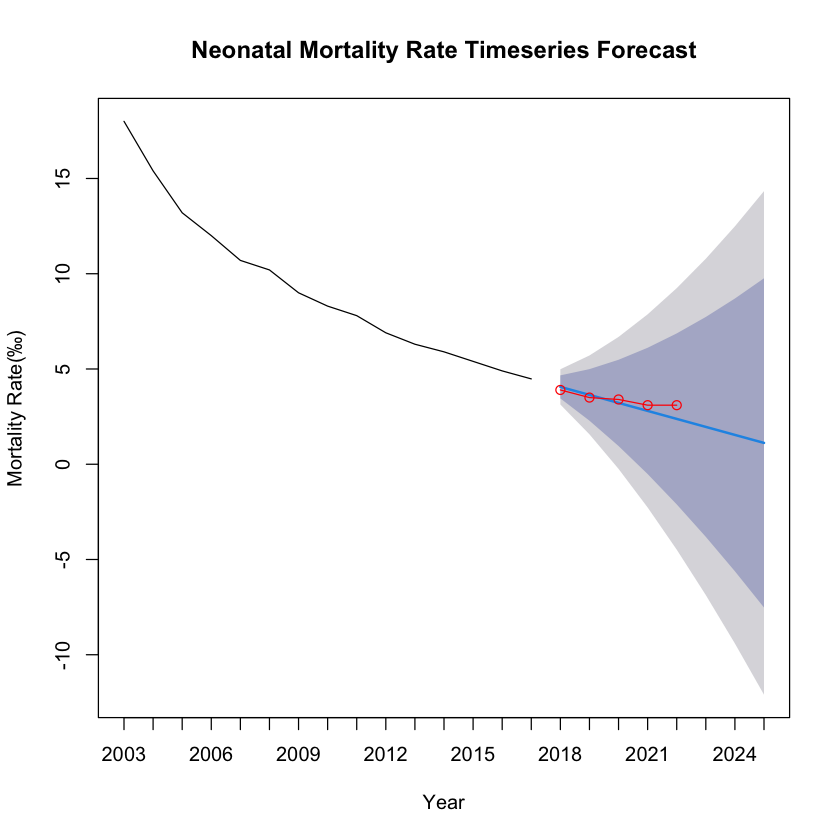

In [12]:

# 提取年份作为列名
years <- colnames(data)[-1] # 第一列之外的所有列名

# 选择特定的指标进行分析
mortality_rate <- as.numeric(data[data$指标 == "新生儿死亡率(‰)", -1])

# 如果数据是降序的，反转它以使其升序
mortality_rate <- rev(mortality_rate)
# 设置时间序列的开始年份为2003
time_series <- ts(mortality_rate, start = c(2003), frequency = 1)

# 定义训练集和测试集的大小
n <- length(time_series)
n_test <- 5 # 测试集大小
n_train <- n - n_test # 训练集大小

# 拆分数据为训练集和测试集
train_set <- time_series[1:n_train]
test_set <- time_series[(n_train + 1):n]


# 使用训练集拟合ARIMA模型
model <- auto.arima(train_set)

# 在测试集上进行预测
forecast <- forecast(model, h = n_test + 3)

# 绘制预测结果

plot(forecast,
  xlab = "Year", ylab = "Mortality Rate(‰)",
  main = "Neonatal Mortality Rate Timeseries Forecast",
  xaxt = "n"
)

x_range <- 2003:2025 # 从2003年到2022年
axis(1, at = seq_along(x_range), labels = x_range)

# 绘制测试集的实际值
start_year_test_set <- n_train + 1

# 绘制测试集的实际值
lines(
  x = seq(start_year_test_set, by = 1, length.out = n_test),
  y = test_set,
  col = "red", type = "o"
)

# 计算预测的准确性
accuracy(forecast, test_set)


# Timeseries-5岁以下儿童死亡率(‰)

Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Under-5 mortality rate (‰) Timeseries Forecast' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Under-5 mortality rate (‰) Timeseries Forecast' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Under-5 mortality rate (‰) Timeseries Forecast' in 'mbcsToSbcs': dot substituted for <b0>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.2474867,1.26505,0.9542962,1.046281,6.279416,0.6170969,-0.4264738
Test set,1.9200000,2.20159,1.9200000,26.708357,26.708357,1.2415704,NA


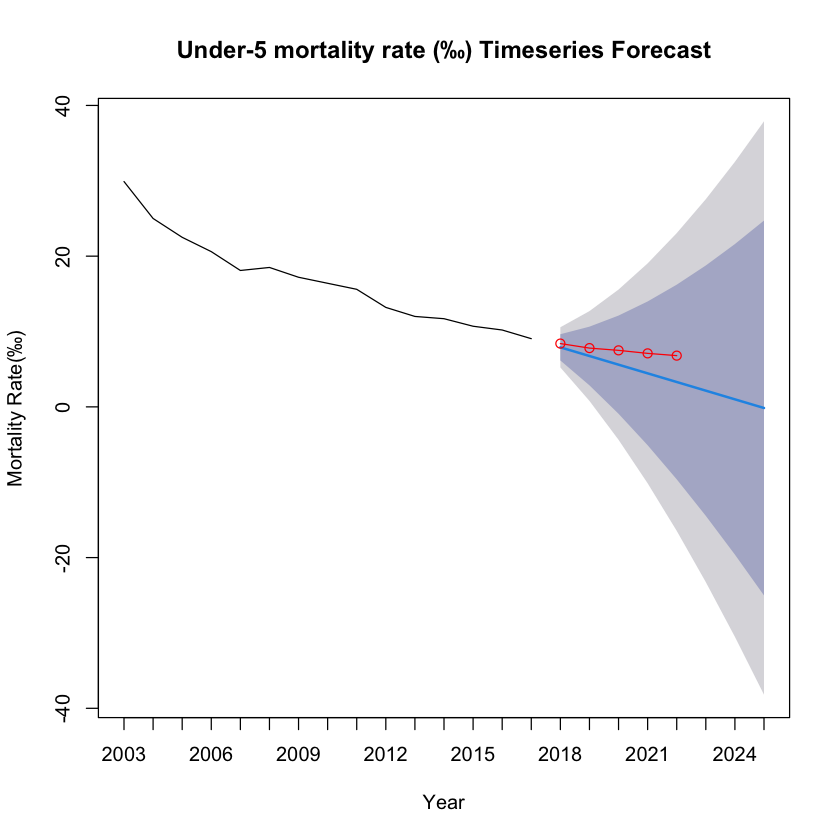

In [13]:
# 提取年份作为列名
years <- colnames(data)[-1] # 第一列之外的所有列名

# 选择特定的指标进行分析
mortality_rate <- as.numeric(data[data$指标 == "5岁以下儿童死亡率(‰)", -1])

# 如果数据是降序的，反转它以使其升序
mortality_rate <- rev(mortality_rate)
# 设置时间序列的开始年份为2003
time_series <- ts(mortality_rate, start = c(2003), frequency = 1)

# 定义训练集和测试集的大小
n <- length(time_series)
n_test <- 5 # 测试集大小
n_train <- n - n_test # 训练集大小

# 拆分数据为训练集和测试集
train_set <- time_series[1:n_train]
test_set <- time_series[(n_train + 1):n]


# 使用训练集拟合ARIMA模型
model <- auto.arima(train_set)

# 在测试集上进行预测
forecast <- forecast(model, h = n_test + 3)

# 绘制预测结果

plot(forecast,
  xlab = "Year", ylab = "Mortality Rate(‰)",
  main = "Under-5 mortality rate (‰) Timeseries Forecast",
  xaxt = "n"
)

x_range <- 2003:2025 # 从2003年到2022年
axis(1, at = seq_along(x_range), labels = x_range)

# 绘制测试集的实际值
start_year_test_set <- n_train + 1

# 绘制测试集的实际值
lines(
  x = seq(start_year_test_set, by = 1, length.out = n_test),
  y = test_set,
  col = "red", type = "o"
)

# 计算预测的准确性
accuracy(forecast, test_set)


# Timeseries-孕产妇死亡率(1/10万)

Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Mortality Rate(‰)' in 'mbcsToSbcs': dot substituted for <b0>”


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.3800723,1.638860,1.2644701,1.868272,4.274092,0.5584411,-0.09932366
Test set,0.2692575,0.493176,0.4013565,1.722898,2.444750,0.1772553,NA


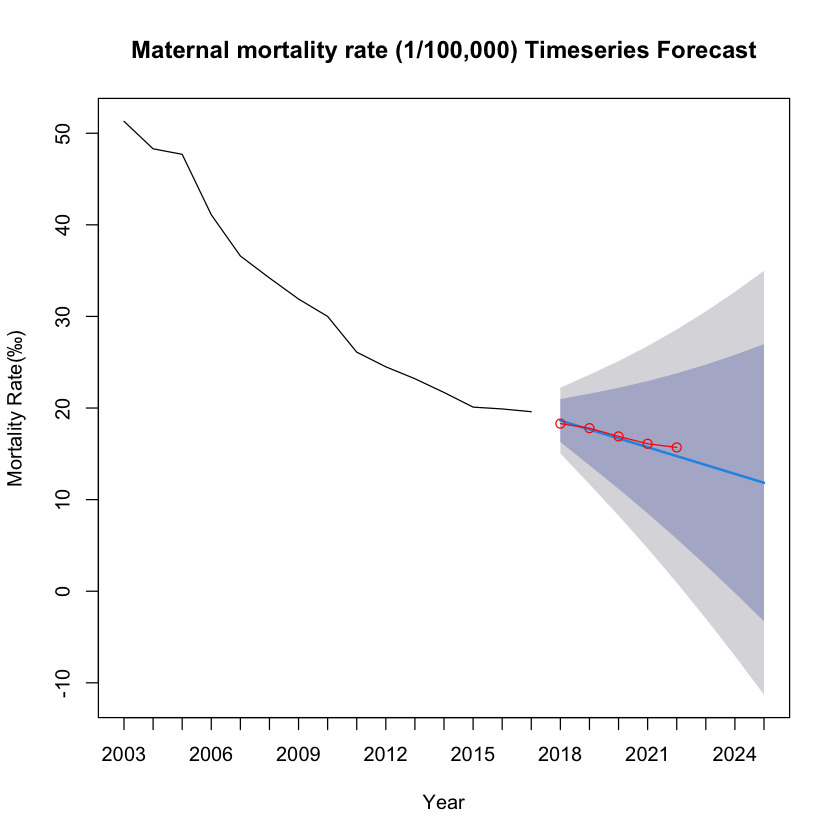

In [11]:

# 提取年份作为列名
years <- colnames(data)[-1] # 第一列之外的所有列名

# 选择特定的指标进行分析
mortality_rate <- as.numeric(data[data$指标 == "孕产妇死亡率(1/10万)", -1])

# 如果数据是降序的，反转它以使其升序
mortality_rate <- rev(mortality_rate)
# 设置时间序列的开始年份为2003
time_series <- ts(mortality_rate, start = c(2003), frequency = 1)

# 定义训练集和测试集的大小
n <- length(time_series)
n_test <- 5 # 测试集大小
n_train <- n - n_test # 训练集大小

# 拆分数据为训练集和测试集
train_set <- time_series[1:n_train]
test_set <- time_series[(n_train + 1):n]


# 使用训练集拟合ARIMA模型
model <- auto.arima(train_set)

# 在测试集上进行预测
forecast <- forecast(model, h = n_test + 3)

# 绘制预测结果

plot(forecast,
  xlab = "Year", ylab = "Mortality Rate(‰)",
  main = "Maternal mortality rate (1/100,000) Timeseries Forecast",
  xaxt = "n"
)

x_range <- 2003:2025 # 从2003年到2022年
axis(1, at = seq_along(x_range), labels = x_range)

# 绘制测试集的实际值
start_year_test_set <- n_train + 1

# 绘制测试集的实际值
lines(
  x = seq(start_year_test_set, by = 1, length.out = n_test),
  y = test_set,
  col = "red", type = "o"
)

# 计算预测的准确性
accuracy(forecast, test_set)
